<a href="https://colab.research.google.com/github/PatrickSampaioUSP/ExperimentalPyshics/blob/master/FisAEstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manual de Incertezas e cálculos

### Desvio Padrão

O desvio padrão mede a variância dos resultados.

Pode-se estimar o desvio padrão através da fórmula seguinte:

$s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N(x_i - m)^2}$

- $N$ é a quantidade de medidas na amostra.
- $m$ é a média da amostra.

A interpretação do Desvio Padrão é o intervalo no qual ao mínimo 68.3% das medidas estão localizadas.

In [0]:
import numpy as np
from math import sqrt
n = 3
#data = np.random.rand(n,1)
data = [0.29, 0.30, 0.28]

calc_std = np.std(data)
mean = np.mean(data)

distance_of_points_to_mean = [(x - mean)**2 for x in data]
somation = sum(distance_of_points_to_mean)
form_std = sqrt((1/(n -1))*(somation))

mean_std = calc_std/sqrt(n)

results = {'np calc std':calc_std, 'manual calc std':form_std, 'mean':mean, 'mean_std':mean_std}
results

{'manual calc std': 0.009999999999999981,
 'mean': 0.29,
 'mean_std': 0.004714045207910308,
 'np calc std': 0.008164965809277244}

### Desvio Padrão da Média

### **Incerteza**

Antes de explicarmos mais afundo sobre a incerteza, é importante pensarmos um pouco sobre as casas decimais. Vamos supor um exemplo, o número 2.68, caso a gente expresse a incerteza da medida como 0.005, não estariamos fazendo nada na realidade, pois não há tal casa decimal no número, por consequência não estariamos mudando em nada este número. Portanto a incerteza não pode ter mais casas decimais do que a própria medida.

Exemplos:

- 1.8820  + 0.79 = 2.67
- 7.538  - 0.7 = 6.8

Toda forma de medida e instrumento de medição esta sujeito à incerteza, e devemos nos atentar a como podemos expressar essas incertezas. Por via de regra, a incerteza de um instrumento será a metade da sua menor medida, i.e a incerteza de um micrometro é 0.005 em mm, a incerteza de uma regua milimetrada seria 0.5 e assim por diante.

#### Propagação de incertezas

Fórmula geral para propagação de incertezas

$\boxed{\sigma_w^2 = (\frac{\partial W}{\partial x})^2\sigma_x^2 + (\frac{\partial W}{\partial y})^2\sigma_y^2 + (\frac{\partial W}{\partial z})^2\sigma_z^2 + \dots{}}$

Um exemplo numérico:

Dada as medidas:

- 8,0 +- 0.5
- 12 +- 2

A somatória destes elementos fica:

- 12 + 8 = 20
- $\sqrt(0.5^2 + 2^2) = 2.06 = 2$

Resultado = 20 +- 2

In [0]:
from math import sqrt
from decimal import Decimal

def equalize_decimal_places(a, b, cases=None):
  if not cases:
    cases = abs(Decimal(str(a)).as_tuple().exponent)
  return round(b, cases)

def sum_measures(a, b):
  final_measure = {'value': None, 'uncertainty':None}
  final_measure['value'] = a['value'] + b['value']

  final_measure['uncertainty'] = sqrt(a['uncertainty']**2 + b['uncertainty']**2)
  final_measure['uncertainty'] = equalize_decimal_places(final_measure['value'], final_measure['uncertainty'])
  return final_measure

def subtract(a, b):
  final_measure = {'value': None, 'uncertainty':None}
  final_measure['value'] = a['value'] - b['value']

  final_measure['uncertainty'] = sqrt(a['uncertainty']**2 + b['uncertainty']**2)
  final_measure['uncertainty'] = equalize_decimal_places(final_measure['value'], final_measure['uncertainty'])
  return final_measure

def multplication(list_of_measures, factor, cases=None):
  uncertainty = 0
  integral_value = list_of_measures[0]['value']

  for idx, measure in enumerate(list_of_measures):
    uncertainty += (measure['uncertainty']/measure['value'])**2
    if idx ==0:
      continue
    integral_value = integral_value * measure['value']
  
  integral_value = round(factor*integral_value, cases) if cases is not None else factor*integral_value
  
  result = {'value': None, 'uncertainty':None}
  result['value'] = integral_value if cases is None else round(integral_value, cases)
  result['uncertainty'] = sqrt(uncertainty)*result['value']
  result['uncertainty'] = equalize_decimal_places(result['value'], result['uncertainty'], cases)
  return result

def division(a, b, cases=None):
  final_measure = {'value': None, 'uncertainty':None}
  final_measure['value'] = a['value'] / b['value']
  final_measure['value'] = final_measure['value'] if cases is None else round(final_measure['value'], cases)

  final_measure['uncertainty'] = sqrt((a['uncertainty']/a['value'])**2 + (b['uncertainty']/b['value'])**2)*final_measure['value']
  final_measure['uncertainty'] = equalize_decimal_places(final_measure['value'], final_measure['uncertainty'], cases)
  return final_measure


first_measure = {'value':6.8, 'uncertainty':0.5}
second_measure = {'value':16.2, 'uncertainty':0.5}

sum_measures(first_measure, second_measure)

{'uncertainty': 0.7, 'value': 23.0}

In [0]:
first_measure = {'value':19.4, 'uncertainty':0.4}
second_measure = {'value':7.6, 'uncertainty':0.3}

sum_measures(fAirst_measure, second_measure)

{'uncertainty': 0.5, 'value': 27.0}

In [0]:
first_measure = {'value':107.0, 'uncertainty':1.4}
second_measure = {'value':56.7, 'uncertainty':2.3}

subtract(first_measure, second_measure)

{'uncertainty': 2.7, 'value': 50.3}

In [0]:
first_measure = {'value':0.1431, 'uncertainty':0.001}
second_measure = {'value':0.0844, 'uncertainty':0.0045}

subtract(first_measure, second_measure)

{'uncertainty': 0.0046, 'value': 0.0587}

In [0]:
first_measure = {'value':63.37, 'uncertainty':0.05}
second_measure = {'value':0.1290, 'uncertainty':0.0050}

subtract(first_measure, second_measure)

{'uncertainty': 0.05, 'value': 63.241}

In [0]:
first_measure = {'value':15.94, 'uncertainty':0.05}
second_measure = {'value':0.99, 'uncertainty':0.06}

multplication([first_measure, second_measure], 1, 2)

{'uncertainty': 0.96, 'value': 15.78}

In [0]:
from math import pi
first_measure = {'value':19.34, 'uncertainty':0.09}
second_measure = {'value':35.35, 'uncertainty':0.09}

division(first_measure, second_measure, 4)

{'uncertainty': 0.0029, 'value': 0.5471}

In [0]:
from math import pi

first_measure = {'value':0.023, 'uncertainty':0.002}
second_measure = {'value':3.6, 'uncertainty':0.2}
third_measure = {'value':0.9, 'uncertainty': 0}

multplication([first_measure, second_measure, third_measure], 6*pi, 4)

{'uncertainty': 0.1449, 'value': 1.4047}

In [0]:
from math import pi
first_measure = {'value':1, 'uncertainty':0}
second_measure = {'value':60.00 , 'uncertainty':0.01}

division(first_measure, second_measure)

{'uncertainty': 2.777777777778e-06, 'value': 0.016666666666666666}

In [0]:
from math import pi

first_measure = {'value':15.16, 'uncertainty':0.09}
second_measure = {'value':0.56, 'uncertainty':0.04}

multplication([first_measure, second_measure], 1, 2)

{'uncertainty': 0.61, 'value': 8.49}

In [0]:
from math import pi

first_measure = {'value':7.50, 'uncertainty':0.01}

multplication([first_measure], pi, 2)

{'uncertainty': 0.03, 'value': 23.56}

## Experimento da Gravidade

##### Incerteza do tempo

Está se utilizando de uma rede eletrica emitindo faiscas em um ovo que realiza um movimento de descida em relação à um trilho, cada faisca possui $\frac{1}{60}$ de intervalo de tempo, todavia, é necessário calcular-se a incerteza do tempo em relação à medida, que é calculado pela seguinte formula:

$\sigma_{t} = \frac{\sigma_f}{f^2}$


In [0]:
from math import pi
first_measure = {'value':1, 'uncertainty':0}
second_measure = {'value':60.00 , 'uncertainty':0.01}

time = division(first_measure, second_measure)
time

> <ipython-input-2-7176c9ea10cc>(51)division()
-> return final_measure
(Pdb) c


{'uncertainty': 2.777777777778e-06, 'value': 0.016666666666666666}

Todavia, estamos trabalhando com intervalos de tempo que são $\frac{1}{30}$, pois utilizamos um intervalo com duas medidas, desta forma precisamos multiplicar por 2

In [0]:
from math import pi

time_interval = multplication([time], 5)
time_interval

{'uncertainty': 1.388888888889e-05, 'value': 0.08333333333333333}

##### Incerteza da régua

A incerteza da régua é a metade da menor unidade, desta forma, $0,5mm$

In [0]:
ruler_sigma = 0.05

#### Incerteza da medida

$\sigma_{\Delta s} = \sqrt{\sigma_{regua}^2 + \sigma_{faísca}^2}$

In [0]:
from math import sqrt

sigma_resultant = round(sqrt(ruler_sigma**2 + 0.1**2), 3)
sigma_resultant

0.112

### Incerteza da Velocidade

$v = \frac{\Delta s}{\Delta t}$

$\sigma_v = v*\sqrt{(\frac{\sigma_{\Delta s}}{\Delta s})^2 + \frac{\sigma_{\Delta t}}{\Delta t})^2}$



#### Resolvendo o experimetno

{'velocity': {'value': 237.0, 'uncertainty': 3.36}, 'time': {'value': 0.03333333333333333, 'uncertainty': 2.78e-06, 'time': 0.016666666666666666, 'str': '1/60'}, 'measure': None, 'space_measure': {'value': 7.9, 'uncertainty': 0.112}}
{'velocity': {'value': 252.9, 'uncertainty': 3.36}, 'time': {'value': 0.03333333333333333, 'uncertainty': 5.56e-06, 'time': 0.03333333333333333, 'str': '2/60'}, 'measure': None, 'space_measure': {'value': 8.43, 'uncertainty': 0.112}}
{'velocity': {'value': 303.0, 'uncertainty': 3.36}, 'time': {'value': 0.03333333333333333, 'uncertainty': 1.389e-05, 'time': 0.08333333333333333, 'str': '5/60'}, 'measure': None, 'space_measure': {'value': 10.1, 'uncertainty': 0.112}}
{'velocity': {'value': 319.5, 'uncertainty': 3.36}, 'time': {'value': 0.03333333333333333, 'uncertainty': 1.667e-05, 'time': 0.1, 'str': '6/60'}, 'measure': None, 'space_measure': {'value': 10.65, 'uncertainty': 0.112}}
{'velocity': {'value': 369.0, 'uncertainty': 3.37}, 'time': {'value': 0.03333

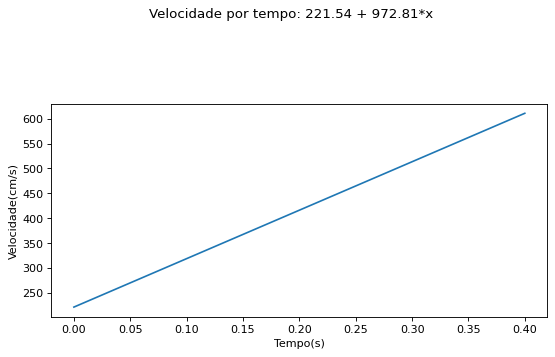

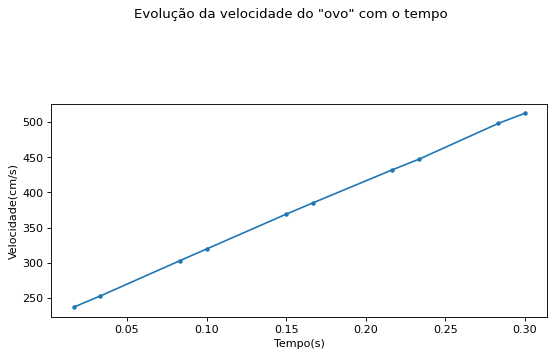

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import xlwt

from decimal import Decimal
from sklearn.linear_model import LinearRegression

data = [{'time':1, 'measure':7.9}, {'time':2, 'measure':8.43}, \
        {'time':5, 'measure':10.10}, {'time':6, 'measure':10.65},\
        {'time':9, 'measure':12.30},{'time':10, 'measure':12.83},\
        {'time':13, 'measure':14.40},{'time':14, 'measure':14.90},\
        {'time':17, 'measure':16.60},{'time':18, 'measure':17.08}]

def plot_graph(experiment_data):
  velocity = []
  time = []
  for data in experiment_data:
    velocity.append(data['velocity']['value'])
    time.append(data['time']['time'])
  
  fig = plt.figure(figsize=(8,12),dpi=80)
  fig.suptitle('Evolução da velocidade do "ovo" com o tempo')
  ax1 = fig.add_subplot(3, 1, 1)
  ax1.set_ylabel('Velocidade(cm/s)')
  ax1.set_xlabel('Tempo(s)')
  ax1.plot(time, velocity, marker='.')
  fig.savefig('grafico')
  print(f'Velocidade maxima {max(velocity)/100}')

def linear_regreassion(experiment_data):
  velocity = []
  time = []
  for data in experiment_data:
    velocity.append(data['velocity']['value'])
    time.append(data['time']['time'])

  model = LinearRegression()
  time, velocity = np.array(time).reshape((-1, 1)), np.array(velocity)
  model.fit(time, velocity)

  space = np.linspace(0, 0.4, 1000)
  value = model.intercept_ + model.coef_[0]*space
  fig = plt.figure(figsize=(8, 12),dpi=80)
  fig.suptitle(f'Velocidade por tempo: {round(model.intercept_, 2)} + {round(model.coef_[0], 2)}*x')
  ax1 = fig.add_subplot(3, 1, 1)
  ax1.set_ylabel('Velocidade(cm/s)')
  ax1.set_xlabel('Tempo(s)')
  ax1.plot(space, value)
  fig.savefig('reglinear')
  print(f'Velocidade da regressão linear em t0 {value[0]}')
  print(f'Valor da gravidade calculado {round(model.coef_[0]/100, 4)} +/- {round(model.coef_[0]/100*0.0005, 4)}')

def generate_table(experimental_data):
  # Load the Drive helper and mount
  from google.colab import drive

  # This will prompt for authorization.
  drive.mount('/content/drive')

  style = xlwt.XFStyle()
  # font
  font = xlwt.Font()
  font.bold = True
  style.font = font

  
  workbook = xlwt.Workbook()
  worksheet = workbook.add_sheet('Dados')

  row = 0
  col = 0
  worksheet.write(0, 0, 'tn (s)', style=style), 
  worksheet.write(0, 1, '𝜎tn (s)', style=style)
  worksheet.write(0, 2, 'ΔSn (cm)', style=style)
  worksheet.write(0, 3, '𝜎∆Sn (cm)', style=style)
  worksheet.write(0, 4, 'vn= ΔSn/Δtn (cm/s)', style=style)
  worksheet.write(0, 5, '𝜎vn (cm/s)', style=style)
  worksheet.write(0, 6, 'vn ± σvn (cm/s)', style=style)
  # Iterate over the data and write it out row by row.
  for idx, item in enumerate(experimental_data):
    worksheet.write(idx+1, 0, item['time']['str'])
    worksheet.write(idx+1, 1, '%.2E' % Decimal(item['time']['uncertainty']))
    worksheet.write(idx+1, 2, '%.2F' % Decimal(item['space_measure']['value']))
    worksheet.write(idx+1, 3, item['space_measure']['uncertainty'])
    worksheet.write(idx+1, 4, '%.2F' % Decimal(item['velocity']['value']))
    worksheet.write(idx+1, 5, '%.2F' % Decimal(item['velocity']['uncertainty']))
    worksheet.write(idx+1, 6, f'{round(item["velocity"]["value"], 1)} ± {round(item["velocity"]["uncertainty"], 1)}')

  workbook.save('FisicaA.xls')

experiment_results = []
for value in data:
  current_value = {'velocity':None, 'time': None, 'measure':None}
  time_uncertanty = multplication([time], value['time'], 8)['uncertainty']
  
  time_measure = {'value':1/30, 'uncertainty':time_uncertanty, 'time': value['time']*1/60, 'str': f'{value["time"]*1}/60'}
  space_measure = {'value':value['measure'], 'uncertainty':sigma_resultant}

  velocity = division(space_measure, time_measure, 2)
  current_value['velocity'] = velocity
  current_value['time'] = time_measure
  current_value['space_measure'] = space_measure
  experiment_results.append(current_value)
  print(current_value)

generate_table(experiment_results)
linear_regreassion(experiment_results)
plot_graph(experiment_results)

  

In [0]:
from math import pi

m = 71.9/1000                           # massa do ovo(kg)
g = 9.7864                              # constante de gravidade
r = 28.3/1000                           # raio maior do ovo(m)
coef_viscosidade_ar = 1.849*10**-5      # coef de viscosidade do ar 300K
densidade_ar = 1.161                    # kg/m^3
max_vel = 5.124                         # velocidade maxima m/s

volume = 4/3 * pi*r**3                  # volume do ovo

atrito_viscoso = 6*pi*coef_viscosidade_ar*r*max_vel
empuxo = volume*densidade_ar*g
peso = m*g

print(f'Força peso: {round(peso, 4)} N. Força de atrito: {round(atrito_viscoso, 4)} N. Empuxo: {round(empuxo, 4)} N')
print(f'Força resultante: {round(peso-atrito_viscoso-empuxo, 4)}')

Força peso: 0.7036 N. Força de atrito: 0.0001 N. Empuxo: 0.0011 N
Força resultante: 0.7025
